# From Spiking Neurons to Deep Neural Networks 

![header-image.png](figures/header-image.png)

We think of neurons as the basic information processing units in our brain.
Similarly, artificial neurons, that we got to know in the previous lectures, constitute a fundamental building block of artificial neural networks.
Albeit having things in common, artifical and biological neurons operate fundamentally differently.
If anything, artifical neurons can be thought of as an oversimplification of the basic integrating characteristic of their biological counterparts.

On the other hand, this oversimplication also comes with benefits such as scalability.
For a neural network model to learn cognitive functionality, upscaling appears to make a more significant difference compared with physiological plausibility.
Additionally, we know that MLPs can approximate arbitrary functions.
In turn, this means MLPs can model the more sophisticated processing happening in biological neurons, it only might take more than just one artificial neuron doing that. 
However, this way we can keep computationally beneficial properties associated with MLPs that are not present in other modeling approaches.

In this lecture, we want to use deep artificial neural networks to model complex dynamical systems, such as biological neurons.
This in mind, we will learn more about a physiological model for information processing in biological neurons: the **intergrate and fire neuron**, and how we can model their dynamical behaviour using deep artificial neural networks.
We will learn that biological neurons feature much richer processing capabilities than artificial neurons, but that deep neural networks are able to approximate them very accurately. 
This result suggests that deep neural networks not only constitute a valid model for biological neurons, but translating to them also enables the field of computational neuroscience to leverage the enormous deep learning toolset and methodology that is available.

# The Integrate and Fire Neuron

In principle, neurons receive information through connections to other neurons (synapses) that are located at the end of their dendrites.
In fact, neurons receive information from a bunch of neighbours, which is why we call it the dendritic tree.
Neurons accumulate all the dendritic inputs, process it and create a resulting signal that is output through synapses at the end of the axon.
In summary, that is the simple input-processing-output principle neural processing units operate on.
Actually, the neural dynamic behaiour is way more sophisticated, but for this lecture, we will continue with that simplified perspective.

![abstract_neuron_cartoon.png](figures/abstract_neuron_cartoon.png)

## Action potentials become spike trains

So far, we have studied physiological models that explain how bio-physically the action potential is mechanistically created in the axon.
Examples of such models are the **Hodgkin-Huxley** or the **Fitz Hugh-Nagamo** model.
The output signal of a neuron comprises a series of characteristic action potential profiles in time.
However, the shape of the profile does not change much.
Therefore, it can not be the action potential profile that encodes information but the relative timing between action potentials.
Their profile itself is only a result of how we mechanistically realise information transmission in this system.
As a consequence, it only contains information about the underlying bio-physical processes involved.

Because the form of the action potential is irrelevant when we are interested in such information based view, we abstract it to only the event of action potential initiation and call this a spike.
In this model, the neural output signal comprises a time series of spikes: a spike train. 
Mathematically, we model a spike train by a superposition of delta functions
$$
s(t) = \sum_{i} \delta(t - t_{i}) \quad \textrm{.}
$$
Here, $t_{i}$ denote the absolute time points at which an action potential is triggered.

![spike_train_abstraction.png](figures/spike_train_abstraction.png)

Note that the spike train model exhibits several mathematical pathologies, such as divergent derivatives. 
Nevertheless, the spike train model turns out to be a useful simplification when handled with care.
But how are the spike trains generated from the signals?

## Generative Models (of spike trains)

Based on our current perspective, the neuron's main function lies in accumulating and processing signals.
In this section, we will discuss how processing can be mechanistically realised.
A common class of approximate neuron models that are useful for modeling spike train signals are so called **Integrate and Fire** models. 

Because the shape of the action potential is only weakly affected by signal and noise, it is more important for us to know when the action potential is initiated. 
The action potential gets inevitably initiated once stimuli and fluctutations have driven the membrane potential $u(t)$ beyond a critical value $u_{\textrm{thresh}}$ and the neuron fires a spike.
This defines a fire criterion, or rule.
After spiking, the membrane potential is brought back to hyperpolarised subthreshold values, the reset potential $u_{\textrm{r}} < u_{\textrm{thresh}}$.
In summary, this defines a **Fire-and-Reset rule**
$$
\begin{aligned}
    u(t) &>& u_{\textrm{thresh}} \quad \Rightarrow \quad \textrm{spike at time} \: t \\
    u(t + \tau_{\textrm{ref}}) &:=& u_{\textrm{r}} \quad \textrm{.}
\end{aligned}
$$
Here, $\tau_{\textrm{ref}}$ denotes the absolute refractory period which takes into account that the neuron is not excitable for a certain amount of time after undergoing hyperpolarisation.

![integrate_and_fire.png](figures/integrate_and_fire.png)

Note that, in general, the characteristic threshold and reset potentials do not need to be restricted by single constant values, but also be functions themselves.
In addition to a **Fire-and-Reset rule**, an **Integrate and Fire** model is defined its characteristic sub-threshold dynamic.
This dynamic is generally non-linear and is driven by the external stimulus current $I(t)$ that respects signal and noise sources.
In simple models, the sub-threshold dynamics are often described by a single **nonlinear Ordinary Differential Equation**
$$
\tau_{m} \frac{d}{dt} u(t) = f(u) + I(t) \quad \textrm{.}
$$

We can choose different kinds of models for our driving source $I(t)$.
To model spontaneous activity, for example, we usually model the driving current by a constant mean current $\mu$ and additive random fluctuations with zero mean $\xi(t)$
$$
I(t) = \mu + \sqrt D \cdot \xi(t) \quad \textrm{.}
$$
Here, $D$ controlles the noise intensity.
This particular model represents common experimental setups quite well.
On the other hand, we might be interested what output a neuron produces when it receives a certain input.
For this, let us assume neuron receives $N_{\textrm{syn}}$ input signals $i_{s}(t)$ through its dendritic synapses.
Through learning, individual synapses become differently pronounced by neuro-plastistic processes. 
As a result, we can think of different synapses having different coupling strenghts $w_{s}$.
We, therefore, model the total incoming signal that the neuron "sees" as the weighted sum of all inputs
$$
I(t) = \sum_{s = 1}^{N_{\textrm{syn}}} w_{s}\, i_{s}(t) \quad \textrm{.}
$$
Here, we model all signals as spike trains
$$
i_{s}(t) = \sum_{f} \delta(t - t^{f}_{s}) \quad \textrm{.}
$$
In this setup, we can not only control the parameters of our **Integrate and Fire** model, but also its input by choosing the spike times $t^{f}_{s}$.
In the following setup, we consider a Poisson point process with constant rate $F_{i}$ to draw the spike times for each source spike train.

# Leaky Integrate and Fire Neuron (LIF)

A simple, linear integrate and fire model features a constant leak current. It is thus called the leaky integrate and fire neuron model.

The differential equation of the membrane potential reads
$$\tau \frac{d}{dt} u(t) = - (u(t) - u_{\textrm{reset}}) + R \, I(t)$$ 
with a Fire-and-Reset Rule: if $u(t) > u_{\textrm{thresh}}$, $u(t) := u_{\textrm{reset}}$.

Formally, we can interpret the equation above as a Langevin equation 
$$\tau \frac{d}{dt} u(t) = - (u(t) - u_{\textrm{reset}}) + R\, I(t)$$
of an overdamped particle in an external potential
$$- U^{\prime}(u) = - (u - u_{\textrm{reset}})$$
that is subject to a random force $R \sqrt{D}\, I(t)$. Here, $\lambda = R\mu + u_{\textrm{reset}}$ summarises the mean leak current.

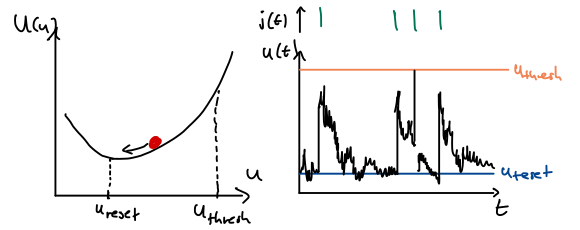

Drawing the analogy, we were able to solve the model qualitatively, just by our intuitive know physical knowledge.
However, it is also possible to solve this linear model analytically.

### General Analytic Solution of LIF
The sub-threshold dynamics of this model is captured by the general solution of the ODE.

$$
u(t) = u_{\textrm{reset}} + \frac{R}{\tau} \int_{0}^{t} I(t^{\prime}) \exp{\left[\frac{t^{\prime}}{\tau}\right]} dt^{\prime} \, \exp{\left[-\frac{t}{\tau}\right]} \quad \forall t < t^{f}
$$


As we can see, $u(t=0) = u_{\textrm{reset}}$, which satisfies our initial condition.
Also note that this solution is valid for all $t < t^{f}$, therefore until the model fires for the first time.

Because of the reset rule, note that this solution is valid between every two $t_{i}^{f} < t < t_{i+1}^{f}$ consecutive firing times $t^{f}_{i}$ and $t^{f}_{i+1}$.
However, for each Inter Spike Interval, the source term $I(t) = I_{i}(t)$ changes.

### General solution of IF driven by spike train inputs

Let us assume a concrete neuron model with $N_{\textrm{syn}}$ input synapses.
Each of the synapses has a coupling strength $w_{j}$ associated with it. 
At each synapse, a spike-train $I_{i}(t)$ arrives
$$I_{j}(t) = \sum_{m \in \mathcal{F}_{j}} \delta(t - t_{m}^{f, j})$$.
Here, $\mathcal{F}_{j}$ denotes the spike time index set of synapse $j$.

In total, we see that 
$$I(t) = \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{m \in \mathcal{F}_{j}} \delta(t - t_{m}^{f, j})$$.

Thus, 
$$
\begin{align*}
     u(t) &=& u_{\textrm{reset}} + \frac{R}{\tau} \int_{t_{i}^{f}}^{t} \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{m \in \mathcal{F}_{j}} \delta(t^{\prime} - t_{m}^{f, j}) \exp{\left[\frac{t^{\prime}}{\tau}\right]} dt^{\prime} \, \exp{\left[-\frac{t}{\tau}\right]} \\
     &=& u_{\textrm{reset}} + \frac{R}{\tau} \, \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{m \in \mathcal{F}_{j}} \, \int_{t_{i}^{f}}^{t} \delta(t^{\prime} - t_{m}^{f, j}) \exp{\left[\frac{t^{\prime}}{\tau}\right]} dt^{\prime} \, \exp{\left[-\frac{t}{\tau}\right]} \\
     &=& u_{\textrm{reset}} + \frac{R}{\tau} \, \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{m \in \left. \mathcal{F}_{j} \right|_{[t_{i}^{f}, t_{i + 1}^{f}]}} \exp{\left[ - \frac{t - t_{m}^{f, j}}{\tau}\right]}\, \Theta(t - t_{m}^{f, j})
\end{align*}
$$
with $\left. \mathcal{F}_{j} \right|_{[t_{i}^{f}, t_{i+1}^{f}]}$ denoting the respective index set restricted to the interval $[t_{i}^{f}, t_{i + 1}^{f}]$.
This index set contains all the indices of spikes that enter synapse $j$ in the respective time interval.

### Interpretation of the solution as an ANN

Let $T \in \mathbb{R}$ be a reasonable time intervall.
We are now interested in a time window $[t_{0}, t_{0} + T]$ shortly after a spike has occured $t_{0} = t_{i}^{f} + \epsilon$, $\epsilon << 1$.
Then, the voltage at $T$ can be calculated by
$$
 u(T) = u_{\textrm{reset}} + \frac{R}{\tau} \, \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{m \in \left. \mathcal{F}_{j} \right|_{[t_{0}, T]}} \exp{\left[-\frac{T - t_{m}^{f, j}}{\tau}\right]}\, \Theta(T - t_{m}^{f, j})
$$
under the neglection of the fire and reset rule.
Thus, to check whether the neuron would have spiked, we have to check whether $u(T) > u_{\textrm{thresh}} \Leftrightarrow u(T) - u_{\textrm{thresh}} > 0$.


Let us introduce a time discretization $\{t_{i}\}_{i \in \mathcal{I}}$ of a fixed time step $\Delta t$ on $[t_{0}, t_{0} + T]$ and denote $\mathbf{x} \in \mathbb{R}^{N_{j} \times T / \Delta t}$ the input tensor of binary spike data at all of the synapses. 
Then, we can write
$$
\begin{align*}
    u(T)
    &= \frac{R}{\tau} \, \sum_{j = 1}^{N_{\textrm{syn}}} w_{j} \, \sum_{i = 0}^{T / \Delta t} \, \mathbf{x}_{ji} \exp{\left[-\frac{T - t_{i}}{\tau}\right]}\, \Theta(T - t_{i}) + u_{\textrm{reset}}
\end{align*}
$$
which can be interpreted as a combination of matrix and inner products
$$
u(T) = \frac{R}{\tau}  (\textbf{w} \mathbf{K})\, \mathbf{x} + u_{\textrm{reset}}
$$
with 
$$
\mathbf{K}_{ji} = \exp{\left[-\frac{T - t_{i}}{\tau}\right]}\, \Theta(T - t_{i}) \quad \text{.}
$$

Consequently, we can treat 
$$
\begin{align*}
    P(T) &= \textrm{ReLU}(u(T)-u_{\textrm{thresh}}) \\
    &= \textrm{ReLU} \left[\frac{R}{\tau} (\textbf{w} \mathbf{K})\, \mathbf{x} + u_{\textrm{reset}} - u_{\textrm{thresh}}\right]
\end{align*}
$$
as a proxy for the time that has past since the last spike of the LIF. 
Formally, this binary approximation of our LIF resembles the equation of a simple ANN with input $\textbf{x}$, weight matrix $\frac{R}{\tau} (\textbf{w} \mathbf{K})$, bias $u_{\textrm{reset}} - u_{\textrm{thresh}}$ and a ReLU activation function.

Thus, we showed that the LIF model is the edge case in which the dynamic model can be represented by a recurrent ANN with one artificial neuron. 
However, as we will see, this does not generalise to more complex integrate and fire models.
Already when we want to implement adaptation, we need a more complex network of artificial neurons.

## Constructing an Artificial Neural Network (ANN) to Simulate a Basic Biological Neuron

When attempting to model the functionality of a biological neuron, we can approach it from various angles and with varying degrees of complexity. On one hand, we have the highly detailed and biophysically accurate models like the Hodgkin-Huxley model. On the other hand, we have simpler, more abstract models, such as artificial neurons.

This raises an important question: Which model should we opt for? The choice is highly dependent on the specific goal of our study. For instance, if we are interested in understanding the complex biophysical intricacies of a neuron, a detailed model might be preferred. However, if our focus is on large-scale simulations of neuronal networks, an abstract model would be more suitable due to its computational efficiency.

Why would we choose a more abstract model over a "more accurate" one? The answer lies in computational cost. Higher levels of abstraction allow us to ignore nonessential details, reducing computational time and enabling us to scale our simulations. This scalability allows us to model and examine networks consisting of billions of neuron connections. The advent of deep learning over the past decade has shown us the potential of these abstract models. Deep learning has tackled and solved numerous complex challenges, such as Chess and Go games, protein folding, image recognition, detection, and captioning, Language Learning Models (LLMs), image generation, and more. This success underscores the value and strength of simple artificial neurons and their ability to form complex behaviors and functions when networked.

However, it's also valid to question the necessity of detailed neuron models if high-level artificial neurons can encapsulate the interesting aspects of a biological neuron. Despite the advancements, artificial neural networks still face several challenges, such as [catastrophic forgetting](https://linkinghub.elsevier.com/retrieve/pii/S0079742108605368). This raises the possibility that some of these issues might be addressed by incorporating more intricate details from biophysically accurate neuron models into artificial neurons.

In this section, we aim to examine the bridge between intricate neuron models and simple artificial ones. We will explore how a network of simple artificial neurons can emulate the behavior of complex biological ones. For this purpose, we will draw inspiration from the recent research paper by [Beniaguev2021](https://linkinghub.elsevier.com/retrieve/pii/S0896627321005018). 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from methods import poisson_neurons, spike_trains_to_binary, lif_integrate, lif_direct, lif_with_adaptation

To start, we simulate a set of incoming spikes sampled from a poisson process. Then we create the output response using a LIF. This will define the input/output relation we will try to approximate using an ANN.

In [2]:
# input parameter
n = 35
N_exc = 4*n  # number of excitatory synapses
N_inh = 1*n  # number of inhibitory synapses
fr_exc = 1.4  # excitatory firing rate in Hz
fr_inh = 1.3  # inhibitory firing rate in Hz

# model parameter
w_exc = 2.0  # excitatory synaptic weight
w_inh = -2.0  # inhibitory synaptic weight
u_thresh = -55.0 # mV
tau = 20.0  # membrane time constant in ms
ur = -70.0  # resting membrane potential in mV

# simulation parameter
T = 60000 # simulation time in ms
dt = 1.0 # time step in ms

# Generate excitatory and inhibitory Poisson spike trains
exc_spike_times = poisson_neurons(N_exc, fr_exc, duration=T)
inh_spike_times = poisson_neurons(N_inh, fr_inh, duration=T)

# Convert spike times to binary spike trains
exc_spike_trains = spike_trains_to_binary(exc_spike_times, duration=T, bin_size=dt)
inh_spike_trains = spike_trains_to_binary(inh_spike_times, duration=T, bin_size=dt)
# stack the two spike trains
spike_trains = np.vstack((exc_spike_trains, inh_spike_trains))

# Simulate the LIF neuron
#us, out_spike_train = lif_integrate(exc_spike_trains, inh_spike_trains, tau=tau, dt=dt, ur=ur, u_thresh=u_thresh, w_exc=w_exc, w_inh=w_inh)
us, out_spike_train = lif_direct(exc_spike_trains, inh_spike_trains, tau=tau, ur=ur, u_thresh=u_thresh, w_exc=w_exc, w_inh=w_inh)
#us, out_spike_train = lif_with_adaptation(exc_spike_trains, inh_spike_trains, dt=dt, T=T, u_rest=ur, u_thresh=u_thresh, tau_m=tau, tau_w=200, a=35, b=1e-9, R=1, w_exc=w_exc, w_inh=w_inh)

# Calculate the output firing rate
output_firing_rate = np.sum(out_spike_train) / (T / 1000)  # spikes per second
print(f"LIF Firing Rate = {output_firing_rate:.4f} Hz")

LIF Firing Rate = 1.1500 Hz


### Show (excitatory and inhibitory) input spikes

Text(0.5, 1.0, 'Raster plot of excitatory and inhibitory neurons')

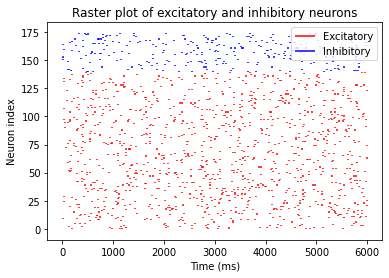

In [3]:
fig, ax = plt.subplots()
color = ['red']*N_exc + ['blue']*N_inh
# only plot spike event for the times smaller than chosen amount of ms
spike_times = exc_spike_times + inh_spike_times
spike_times = [spike_time[spike_time < 6000] for spike_time in spike_times]
ax.eventplot(spike_times, color=color)
# create blue and red legend for excitatory and inhibitory neurons
ax.legend(['Excitatory', 'Inhibitory'])
leg = ax.get_legend()
leg.legend_handles[0].set_color('red')
leg.legend_handles[1].set_color('blue')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron index')
ax.set_title('Raster plot of excitatory and inhibitory neurons')

### Show LIF-neuron output based on the given input spikes

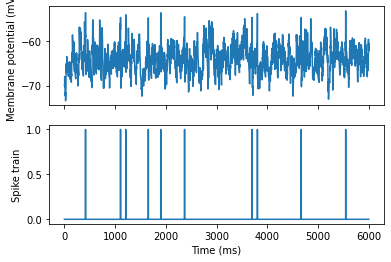

In [4]:

tmax = 6000
time = np.arange(0, tmax, dt)
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(time, us[:len(time)])
ax[0].set_ylabel('Membrane potential (mV)')

ax[1].plot(time, out_spike_train[:len(time)])
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Spike train')

plt.show()

## Exercise 1: Constructing a Deep Learning Model for Neural Simulation

Next, we'll construct a deep learning model designed to approximate the behavior of the Leaky Integrate-and-Fire (LIF) neuron discussed earlier. According to the findings in Beniaguev2021, a single-layer temporal convolutional model is sufficient for this task. To make the training process more efficient, we'll implement several strategic methods. These strategies include:

1. Utilizing the [Adam optimizer](https://arxiv.org/abs/1412.6980), an advanced gradient descent training algorithm. Adam incorporates techniques such as mini-batching, momentum, and an adaptive learning rate to optimize the training process.
2. Employing a learning rate scheduler to gradually reduce the learning rate during training. This (heuristically) helps the model to converge more accurately towards a local minimum by incrementally decreasing the step size of each gradient update.
3. Applying a dynamic weighting scheme in the classification loss that takes into account the frequency of different classes. This ensures that the network assigns equal importance to all class types, even when the dataset is skewed towards one class over others.
4. Standardizing the input/output (I/O) data. In our case, we standardize the target voltage only. Neural network weights are typically initialized with the assumption that input data is centered and scaled appropriately. If this isn't the case, training can become tediously slow.

To build our deep learning model using the PyTorch library, we'll follow these steps:

1. Create a class that inherits from the "torch.nn.Module". This forms the skeleton of our neural network model.
2. Initialize your network by specifying the components that will make up your model architecture. This is where we define the layers and their parameters.
3. Define a "forward()" method. This method outlines the computational flow of the network, connecting the previously defined layers and specifying their interactions. This function essentially overrides the __call__() method of the class, allowing us to pass input data through the model.
4. Define a loss function, or loss_fn(). This function quantifies the difference between the model's predictions and the actual targets, providing a measure that can be minimized during training. Although it's not required to include this function within the model class, it's a convenient place to put it for organizational purposes.

**Fill in** the blanks "___" in the `forwar` and `loss_fn` methods of the code below

In [5]:
import torch

class DeepLIF(torch.nn.Module):
    def __init__(self, n_inputs=175, n_time_bins=80, lr=1e-2):
        """
        Parameters:
            n_inputs, int: number of input excitatory + inhibitory neurons
            n_time_bins, int: number of time bins in the simulation (assume dt=1ms)
        """
        super().__init__()
        self.n_inputs = n_inputs
        self.n_time_bins = n_time_bins

        # connect all inputs at all time bins to a single output neuron
        self.W = torch.nn.Linear(n_inputs * n_time_bins, 1, bias=True)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=20, gamma=0.9)
    
    def forward(self, input_spikes, sigmoid=True):
        """
        Parameters:
            input_spikes, torch.Tensor: input tensor of shape (batch_size, n_inputs, n_time_bins)
        Returns:
            torch.Tensor: output tensor of shape (batch_size, 1)
        """
        # if input_spikes are not a tensor, convert to tensor
        if not isinstance(input_spikes, torch.Tensor):
            input_spikes = torch.tensor(input_spikes, dtype=torch.float32)
        # flatten the input tensor to shape (batch_size, n_inputs * n_time_bins)
        input_spikes = input_spikes.reshape(input_spikes.shape[0], -1)
        pred_voltages = ___ # <---- FILL IN
        if sigmoid:
            pred_spikes = ___ # <---- FILL IN
            return pred_spikes
        return pred_voltages
    
    def loss_fn(self, input_spikes, true_spikes, true_voltages, lambda_spikes=0.1, lambda_voltages=1.0):
        """
        Loss function for both spike and voltage loss.

        Parameters:
            input_spikes, torch.Tensor: input tensor of shape (batch_size, n_inputs, n_time_bins)
            true_spikes, torch.Tensor: true spike tensor of shape (batch_size, 1)
            true_voltages, torch.Tensor: true voltage tensor of shape (batch_size, 1)
        Returns:
            torch.Tensor: loss tensor of shape (1,)
        """
        # forward pass
        pred_voltages = self.forward(input_spikes, sigmoid=False)
        pred_spikes = torch.sigmoid(pred_voltages)
        # calculate loss
        spike_loss, voltage_loss = 0, 0
        # whether to include spike loss
        if true_spikes is not None:
            # must change shape of true_spikes
            true_spikes = torch.tensor(true_spikes, dtype=torch.float32) if not isinstance(true_spikes, torch.Tensor) else true_spikes
            # Calculate class frequencies
            unique, counts = true_spikes.unique(return_counts=True)
            class_weights = 1. / counts.float()
            class_weights = class_weights / class_weights.sum()

            # Create a weight tensor based on the class frequencies
            weight = torch.zeros_like(true_spikes)
            for i, u in enumerate(unique):
                weight[true_spikes == u] = class_weights[i]

            # Calculated weighted binary cross entropy loss
            spike_loss = ___ # <---- FILL IN
        # whether to include voltage loss
        if true_voltages is not None:
            true_voltages = torch.tensor(true_voltages, dtype=torch.float32) if not isinstance(true_voltages, torch.Tensor) else true_voltages
            # Calculate the mean squared error loss
            voltage_loss = ___ # <---- FILL IN
        return lambda_spikes * spike_loss + lambda_voltages * voltage_loss
    
    def train_step(self, **kwargs):
        """
        Parameters:
            kwargs, dict: keyword arguments for loss_fn
        Returns:
            torch.Tensor: loss tensor of shape (1,)
        """
        self.optimizer.zero_grad()
        loss = self.loss_fn(**kwargs)
        loss.backward()
        self.optimizer.step()
        return loss

**SOLUTION**

In [ ]:
import torch

class DeepLIF(torch.nn.Module):
    def __init__(self, n_inputs=175, n_time_bins=80, lr=1e-2):
        """
        Parameters:
            n_inputs, int: number of input excitatory + inhibitory neurons
            n_time_bins, int: number of time bins in the simulation (assume dt=1ms)
        """
        super().__init__()
        self.n_inputs = n_inputs
        self.n_time_bins = n_time_bins

        # connect all inputs at all time bins to a single output neuron
        self.W = torch.nn.Linear(n_inputs * n_time_bins, 1, bias=True)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=20, gamma=0.9)
    
    def forward(self, input_spikes, sigmoid=True):
        """
        Parameters:
            input_spikes, torch.Tensor: input tensor of shape (batch_size, n_inputs, n_time_bins)
        Returns:
            torch.Tensor: output tensor of shape (batch_size, 1)
        """
        # if input_spikes are not a tensor, convert to tensor
        if not isinstance(input_spikes, torch.Tensor):
            input_spikes = torch.tensor(input_spikes, dtype=torch.float32)
        # flatten the input tensor to shape (batch_size, n_inputs * n_time_bins)
        input_spikes = input_spikes.reshape(input_spikes.shape[0], -1)
        pred_voltages = self.W(input_spikes)
        if sigmoid:
            pred_spikes = torch.sigmoid(pred_voltages)
            return pred_spikes
        return pred_voltages
    
    def loss_fn(self, input_spikes, true_spikes, true_voltages, lambda_spikes=0.1, lambda_voltages=1.0):
        """
        Loss function for both spike and voltage loss.

        Parameters:
            input_spikes, torch.Tensor: input tensor of shape (batch_size, n_inputs, n_time_bins)
            true_spikes, torch.Tensor: true spike tensor of shape (batch_size, 1)
            true_voltages, torch.Tensor: true voltage tensor of shape (batch_size, 1)
        Returns:
            torch.Tensor: loss tensor of shape (1,)
        """
        # forward pass
        pred_voltages = self.forward(input_spikes, sigmoid=False)
        pred_spikes = torch.sigmoid(pred_voltages)
        # calculate loss
        spike_loss, voltage_loss = 0, 0
        # whether to include spike loss
        if true_spikes is not None:
            # must change shape of true_spikes
            true_spikes = torch.tensor(true_spikes, dtype=torch.float32) if not isinstance(true_spikes, torch.Tensor) else true_spikes
            # Calculate class frequencies
            unique, counts = true_spikes.unique(return_counts=True)
            class_weights = 1. / counts.float()
            class_weights = class_weights / class_weights.sum()

            # Create a weight tensor based on the class frequencies
            weight = torch.zeros_like(true_spikes)
            for i, u in enumerate(unique):
                weight[true_spikes == u] = class_weights[i]

            # Use the weight tensor in the binary cross entropy loss
            spike_loss = torch.nn.functional.binary_cross_entropy(pred_spikes, true_spikes, weight=weight)
        # whether to include voltage loss
        if true_voltages is not None:
            true_voltages = torch.tensor(true_voltages, dtype=torch.float32) if not isinstance(true_voltages, torch.Tensor) else true_voltages
            voltage_loss = torch.nn.functional.mse_loss(true_voltages, pred_voltages)
        return lambda_spikes * spike_loss + lambda_voltages * voltage_loss
    
    def train_step(self, **kwargs):
        """
        Parameters:
            kwargs, dict: keyword arguments for loss_fn
        Returns:
            torch.Tensor: loss tensor of shape (1,)
        """
        self.optimizer.zero_grad()
        loss = self.loss_fn(**kwargs)
        loss.backward()
        self.optimizer.step()
        return loss

### Instantiate model and look at initial (random) connectivity

In [6]:
# initialise model
model = DeepLIF()
loss_history = []
# standardize (z-score) the target voltages
standardized_us = (us - np.mean(us)) / np.std(us) #us - np.mean(us) 
# save initial weight profile
initial_connectivity = model.W.weight.detach().clone().numpy().reshape(model.n_inputs, model.n_time_bins)

Text(0.5, 1.0, 'Initial Weight profile')

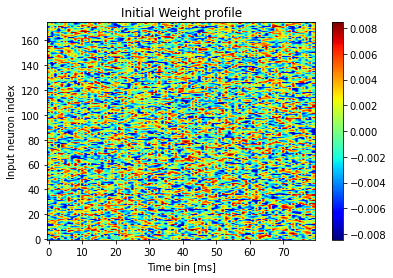

In [7]:

# plot weight profile
plt.imshow(initial_connectivity, origin='lower', aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time bin [ms]')
plt.ylabel('Input neuron index')
plt.title('Initial Weight profile')

## Exercise 2: Define data sampling strategy by picking out random 80ms spike-train windows
Complete the code below to sample a data batch to be used for training. The method should slice out `window_size`d portions from the `full n_time_bins`d dataset.

In [ ]:
def sample_data_batch(spike_trains, standardized_us, out_spike_train, window_size = 80, batch_size=128, sequential=False):
    """
    Sample a batch of data from the dataset.

    Parameters:
        spike_trains, np.ndarray: spike trains of shape (n_inputs, n_time_bins)
        standardized_us, np.ndarray: standardized (z-scored) membrane potentials of shape (n_time_bins,)
        out_spike_train, np.ndarray: output spike train of shape (n_time_bins,)
        window_size, int: size of window to sample
        batch_size, int: number of samples to take
        sequential, bool: whether to sample sequentially or randomly
    Returns:
        x, torch.Tensor: input tensor of shape (batch_size, n_inputs, window_size)
        y, torch.Tensor: output tensor of shape (batch_size, 1)
        u, torch.Tensor: membrane potential tensor of shape (batch_size, 1)
    """
    # sample start indices
    if sequential:
        start_indices = np.arange(0, batch_size, 1)
    else:
        start_indices = np.random.randint(0, spike_trains.shape[1]-window_size-1, batch_size)
    # get slices of spike trains and membrane potentials for each of the sampled start indices

    # 
    # TODO: Create mini-batches of spike trains and membrane potentials by slicing
    # 

    # convert to torch tensors
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    u = torch.from_numpy(u).float()
    return x, y, u

**SOLUTION**

In [8]:
def sample_data_batch(spike_trains, standardized_us, out_spike_train, window_size = 80, batch_size=128, sequential=False):
    """
    Sample a batch of data from the dataset.

    Parameters:
        spike_trains, np.ndarray: spike trains of shape (n_inputs, n_time_bins)
        standardized_us, np.ndarray: standardized (z-scored) membrane potentials of shape (n_time_bins,)
        out_spike_train, np.ndarray: output spike train of shape (n_time_bins,)
        window_size, int: size of window to sample
        batch_size, int: number of samples to take
        sequential, bool: whether to sample sequentially or randomly
    Returns:
        x, torch.Tensor: input tensor of shape (batch_size, n_inputs, window_size)
        y, torch.Tensor: output tensor of shape (batch_size, 1)
        u, torch.Tensor: membrane potential tensor of shape (batch_size, 1)
    """
    if sequential:
        start_indices = np.arange(0, batch_size, 1)
    else:
        start_indices = np.random.randint(0, spike_trains.shape[1]-window_size-1, batch_size)
    # get slices of spike trains and membrane potentials for each of the sampled start indices
    x = np.array([spike_trains[:, start_idx:start_idx+window_size] for start_idx in start_indices])
    y = np.array([out_spike_train[start_idx+window_size:start_idx+window_size+1] for start_idx in start_indices])
    u = np.array([standardized_us[start_idx+window_size:start_idx+window_size+1] for start_idx in start_indices])
    # convert to torch tensors
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    u = torch.from_numpy(u).float()
    return x, y, u

## Exercise 3: Train the model and show the training loss
Fill in the blanks "___" in the code below to complete the training loop of the model.

In [ ]:
import tqdm

# train model
n_epochs = 250
batch_size = 64
window_size = 80
total_batches = int(T / dt) * n_epochs / (batch_size * window_size)
pbar = tqdm.tqdm(total=total_batches, desc='Training progress')

for epoch in range(n_epochs):
    # train on one batch of data
    pbar.update()
    for i in range(int(T / dt) // (batch_size * window_size)):
        x, y, u = ___ # <---- FILL IN
        loss = ___ # <---- FILL IN
        loss_history.append(loss.item())
        if i % 100 == 0:
            pbar.set_postfix({'loss': loss.item(), 'Epoch': epoch + 1})
        pbar.update()
    model.scheduler.step()
pbar.close()

**SOLUTION**

In [9]:
import tqdm

# train model
n_epochs = 250
batch_size = 64
window_size = 80
total_batches = int(T / dt) * n_epochs / (batch_size * window_size)
pbar = tqdm.tqdm(total=total_batches, desc='Training progress')

for epoch in range(n_epochs):
    # train on one batch of data
    pbar.update()
    for i in range(int(T / dt) // (batch_size * window_size)):
        x, y, u = sample_data_batch(spike_trains, standardized_us, out_spike_train, window_size = window_size ,batch_size=batch_size)
        loss = model.train_step(input_spikes=x, true_spikes=y, true_voltages=u)
        loss_history.append(loss.item())
        if i % 100 == 0:
            pbar.set_postfix({'loss': loss.item(), 'Epoch': epoch + 1})
        pbar.update()
    model.scheduler.step()
pbar.close()

Training progress: 3000it [00:08, 356.02it/s, loss=0.257, Epoch=250]                               


Text(0.5, 1.0, 'Training loss')

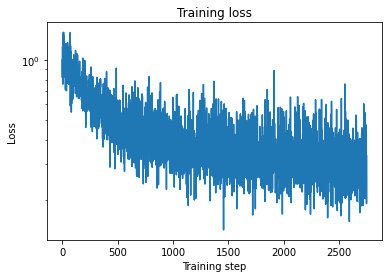

In [10]:
plt.semilogy(loss_history)
plt.xlabel('Training step')
plt.ylabel('Loss')
plt.title('Training loss')

# Show the learned connectivity, and compare to mathematically derived "ground truth"

In [11]:
# get weight profile
learned_connectivity = model.W.weight.detach().clone().numpy().reshape(model.n_inputs, model.n_time_bins)*np.std(us)
# smooth connectivity in time using a 1d gaussian filter from scipy
from scipy.ndimage import gaussian_filter1d
smoothed_connectivity = gaussian_filter1d(learned_connectivity, sigma=5, axis=1)#, mode='nearest')

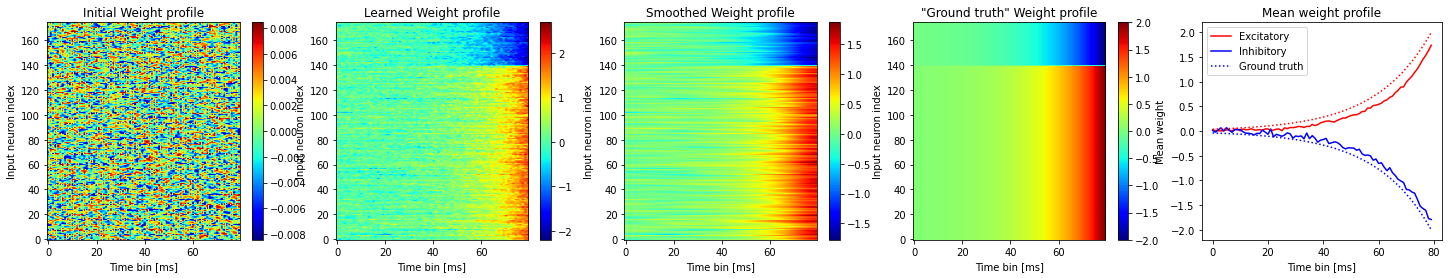

In [23]:
fig, ax = plt.subplots(1, 5, figsize=(25, 4))
# --- plot weight profile ---
ax[0].imshow(initial_connectivity, origin='lower', aspect='auto', cmap='jet')
ax[0].set_xlabel('Time bin [ms]')
ax[0].set_ylabel('Input neuron index')
ax[0].set_title('Initial Weight profile')
# add colorbar
cbar = ax[0].figure.colorbar(ax[0].images[0], ax=ax[0])

# --- plot initial weight profile ---
ax[1].imshow(learned_connectivity, origin='lower', aspect='auto', cmap='jet')
ax[1].set_xlabel('Time bin [ms]')
ax[1].set_ylabel('Input neuron index')
ax[1].set_title('Learned Weight profile')
# add colorbar
cbar = ax[1].figure.colorbar(ax[1].images[0], ax=ax[1])

# --- plot smoothed weight profile ---
ax[2].imshow(smoothed_connectivity, origin='lower', aspect='auto', cmap='jet')
ax[2].set_xlabel('Time bin [ms]')
ax[2].set_ylabel('Input neuron index')
ax[2].set_title('Smoothed Weight profile')
# add colorbar
cbar = ax[2].figure.colorbar(ax[2].images[0], ax=ax[2])

# --- plot "ground truth" weight profile ---
def K(spike_counts, weight):
    # kernel function
    t_spike = np.arange(len(spike_counts))
    return weight * spike_counts * np.exp(-t_spike[::-1] / tau)

ground_truth_connectivity_exc = K(np.ones(model.n_time_bins), w_exc)
ground_truth_connectivity_inh = K(np.ones(model.n_time_bins), w_inh)
# repeat for each excitatory and inhibitory input neuro (as the weights are identical for each type of input neuron)
ground_truth_connectivity_exc = np.tile(ground_truth_connectivity_exc, (N_exc, 1))
ground_truth_connectivity_inh = np.tile(ground_truth_connectivity_inh, (N_inh, 1))
# stack the ground truth connectivity matrices
ground_truth_connectivity = np.vstack((ground_truth_connectivity_exc, ground_truth_connectivity_inh))
# plot ground truth connectivity
ax[3].imshow(ground_truth_connectivity, origin='lower', aspect='auto', cmap='jet')
ax[3].set_xlabel('Time bin [ms]')
ax[3].set_ylabel('Input neuron index')
ax[3].set_title('"Ground truth" Weight profile')
# add colorbar
cbar = ax[3].figure.colorbar(ax[3].images[0], ax=ax[3])

# --- plot mean weight profile ---
ax[4].plot(np.mean(learned_connectivity[:N_exc], axis=0), label='Excitatory', color='red')
ax[4].plot(np.mean(learned_connectivity[N_exc:], axis=0), label='Inhibitory', color='blue')
#ax[4].plot(np.mean(smoothed_connectivity[:N_exc], axis=0), label='Smoothed', color='red', linestyle='--')
#ax[4].plot(np.mean(smoothed_connectivity[N_exc:], axis=0), color='blue', linestyle='--')
ax[4].plot(np.mean(ground_truth_connectivity[:N_exc], axis=0), color='red', linestyle=':')
ax[4].plot(np.mean(ground_truth_connectivity[N_exc:], axis=0), label='Ground truth', color='blue', linestyle=':')
#ax[4].plot(np.mean(initial_connectivity[:N_exc], axis=0), color='red', linestyle='-.')
#ax[4].plot(np.mean(initial_connectivity[N_exc:], axis=0), label='Initial', color='blue', linestyle='-.')
ax[4].set_xlabel('Time bin [ms]')
ax[4].set_ylabel('Mean weight')
ax[4].set_title('Mean weight profile')
ax[4].legend()

### Check how well the model predicts voltage compared to the true voltage

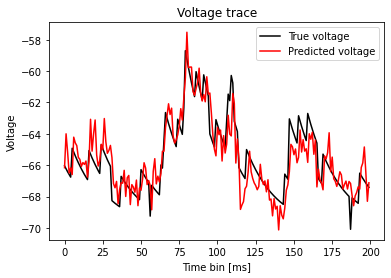

In [21]:
# get predicted voltage trace
x, y, u = sample_data_batch(spike_trains, us, out_spike_train, batch_size=200, sequential=True)
predicted_voltages = model(x, sigmoid=False).detach().numpy() * np.std(us) + np.mean(us)
# plot the predicted voltage trace against the true voltage trace
plt.plot(u[:,0], label='True voltage', color='black')
plt.plot(predicted_voltages[:,0], label='Predicted voltage', color='red')
plt.xlabel('Time bin [ms]')
plt.ylabel('Voltage')
plt.title('Voltage trace')
plt.legend()